In [ ]:
# Part 1: Imports & Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# Part 2: Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


In [ ]:
# Part 3: Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

LATENT_DIM = 32
model = Autoencoder(latent_dim=LATENT_DIM).to(device)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 20
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1/20, Loss: 0.0472
Epoch 2/20, Loss: 0.0207
Epoch 3/20, Loss: 0.0153
Epoch 4/20, Loss: 0.0129
Epoch 5/20, Loss: 0.0114
Epoch 6/20, Loss: 0.0104
Epoch 7/20, Loss: 0.0097
Epoch 8/20, Loss: 0.0091
Epoch 9/20, Loss: 0.0087
Epoch 10/20, Loss: 0.0084
Epoch 11/20, Loss: 0.0081
Epoch 12/20, Loss: 0.0079
Epoch 13/20, Loss: 0.0077
Epoch 14/20, Loss: 0.0076
Epoch 15/20, Loss: 0.0074
Epoch 16/20, Loss: 0.0073
Epoch 17/20, Loss: 0.0072
Epoch 18/20, Loss: 0.0071
Epoch 19/20, Loss: 0.0070
Epoch 20/20, Loss: 0.0069


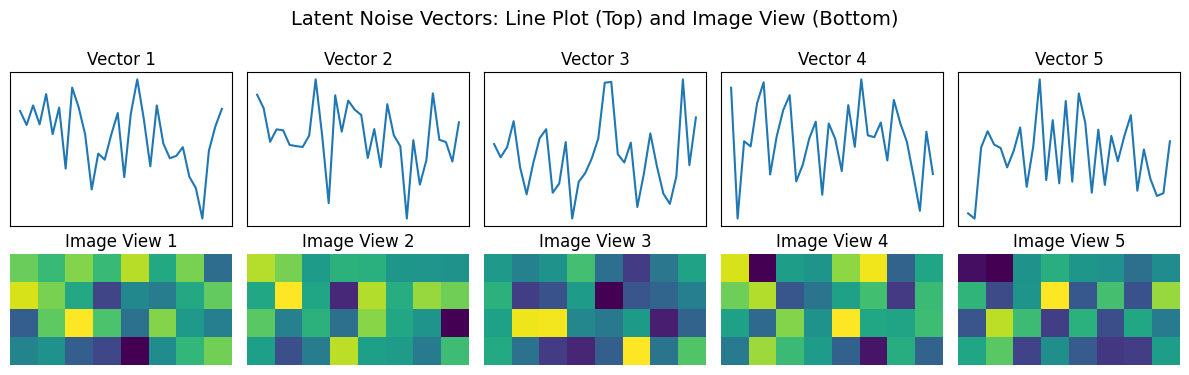

In [ ]:
model.eval()
num_images = 5
noise = torch.normal(mean=5.0, std=1.0, size=(num_images, LATENT_DIM)).to(device)

fig, axes = plt.subplots(2, num_images, figsize=(12, 4))

for i in range(num_images):
    # Plot the latent vector as a line
    axes[0, i].plot(noise[i].cpu().numpy())
    axes[0, i].set_title(f"Vector {i+1}")
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

    # Show latent vector reshaped as image (e.g., 4x8)
    img = noise[i].cpu().numpy().reshape(4, 8)
    axes[1, i].imshow(img, cmap='viridis')
    axes[1, i].set_title(f"Image View {i+1}")
    axes[1, i].axis('off')

plt.suptitle("Latent Noise Vectors: Line Plot (Top) and Image View (Bottom)", fontsize=14)
plt.tight_layout()
plt.show()

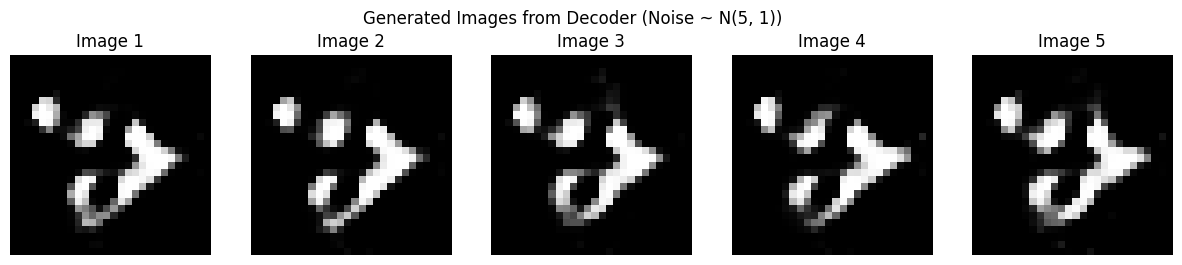

In [ ]:
with torch.no_grad():
    generated_images = model.decoder(noise)

fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
for i in range(num_images):
    img = generated_images[i].cpu().squeeze().numpy()
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")
plt.suptitle("Generated Images from Decoder (Noise ~ N(5, 1))")
plt.show()